# Time Series Analysis

Financial price data can be represented as a time-indexed random process. It is reasonable to say that the price of oil today depends quite strongly on its price yesterday, as while real-world conditions are always changing, the condition of the world tomorrow will be very correlated to how it is today. As such, we aim to understand, model, and predict the movements in oil prices using econometric time series models.

### Imports and Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf


In [ ]:
COMBINED_DATA = (
    pd.read_csv("../Datasets/Futures_Oil_Combined.csv")
)

# done to ensure the Date column is parsed properly
COMBINED_DATA['Date'] = pd.to_datetime(COMBINED_DATA['Date'])

display(COMBINED_DATA)

,Date,Change_WTI,Price_WTI,Vol_WTI,Change_Brent,Price_Brent,Vol_Brent,Change_Dubai,Price_Dubai,Vol_Dubai
0,2000-01-02,0.0210,28.22,76.41K,0.0162,26.39,40.36K,NaN,NaN,NaN
1,2000-01-03,0.0440,31.77,73.33K,0.0345,29.06,42.11K,NaN,NaN,NaN
2,2000-01-05,0.0051,25.87,29.44K,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,0.0390,30.14,67.23K,0.0311,29.19,28.67K,NaN,NaN,NaN
4,2000-01-08,0.0131,27.79,62.86K,0.0078,27.14,25.00K,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6773,2024-12-06,0.0077,78.50,322.29K,0.0075,82.15,260.33K,NaN,NaN,NaN
6774,2024-12-07,-0.0050,82.21,370.06K,-0.0038,84.10,274.92K,NaN,NaN,NaN
6775,2024-12-08,0.0419,80.06,376.75K,0.0312,81.38,245.73K,NaN,NaN,NaN
6776,2024-12-09,0.0247,68.97,351.98K,0.0180,71.43,364.75K,NaN,NaN,NaN


### Autocorrelation Plot

The autocorrelation function (ACF) of a time series is the Pearson correlation between values of the data at different time lags. Intuitively, the ACF represents how similar the observations of a time series at time $t$ are with their observations at time $t-k$, i.e. its own values $k$ steps back.

Denoting the dataset as $\{{X_t}\}_{t=0}^{T}$, then the estimated autocorrelation for lag $k$ is:

\begin{equation}
    \hat{R}(k) = \frac{1}{(n - k)\sigma^2} \Sigma^{n-k}_{t=1} (X_t - \mu)(X_{t+k} - \mu)
\end{equation}

Where \mu is the sample mean, \sigma^2 the sample variance.

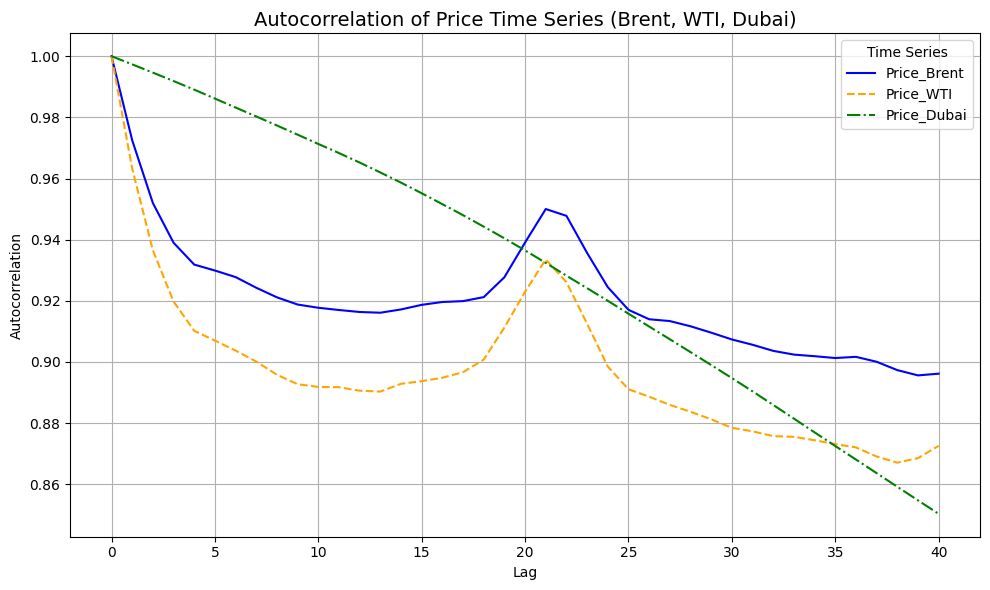

In [3]:


# Assume COMBINED_DATA is already defined
fig, ax = plt.subplots(figsize=(10, 6))

# Colors and line styles for each time series
colors = ['blue', 'orange', 'green']
linestyles = ['-', '--', '-.']

# Plot autocorrelation for each time series
for idx, colname in enumerate(['Price_Brent', 'Price_WTI', 'Price_Dubai']):
    time_series = COMBINED_DATA[colname].dropna()
    
    # Compute autocorrelations using ACF
    autocorr = acf(time_series, nlags=40)
    
    # Plot the autocorrelation with a specific color and linestyle
    ax.plot(autocorr, label=colname, color=colors[idx], linestyle=linestyles[idx])

# Add labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation of Price Time Series (Brent, WTI, Dubai)', fontsize=14)
ax.legend(title='Time Series', loc='upper right')

# Add grid for better readability
ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Durbin-Watson Test / Ljung-Box Test / Box-Pierce Test

These are tests for statistical significance of autocorrelation 